In [2]:
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
# import center of mass
from scipy.ndimage import center_of_mass
import cv2

(123.55975702906846, 59.136249246858426)


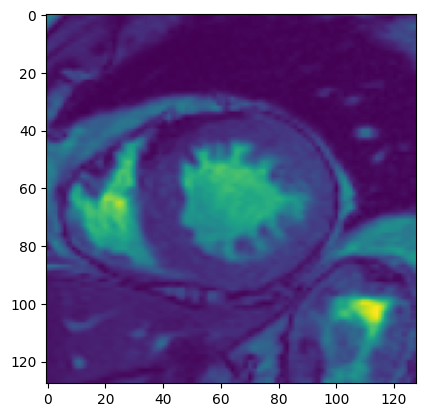

In [35]:
image = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Code/FrameWork/real_test_data/patient024_frame01_slice_3_ACDC.npy")
center_of_mass_x = center_of_mass(image)

print(center_of_mass_x)

plt.imshow(image)
# plt.imshow(center_of_mass_x, center_of_mass_y, cmap='hot', interpolation='nearest')


plt.show()



In [21]:
       

def apply_displacement( image, x_displacement, y_displacement):
        # Prepare meshgrid for remap
        height, width = image.shape
        x, y = np.meshgrid(np.arange(width), np.arange(height))

        # Apply displacement (scale the displacements for more visible effect)
        x_new = (x + x_displacement).astype(np.float32)
        y_new = (y + y_displacement).astype(np.float32)
        # convert image tensor to numpy
        # image = image.numpy()


        # Warp the image using remap for both x and y displacements
        displaced_image = cv2.remap(image, x_new, y_new, interpolation=cv2.INTER_LANCZOS4, borderMode=cv2.BORDER_REFLECT)
        return displaced_image

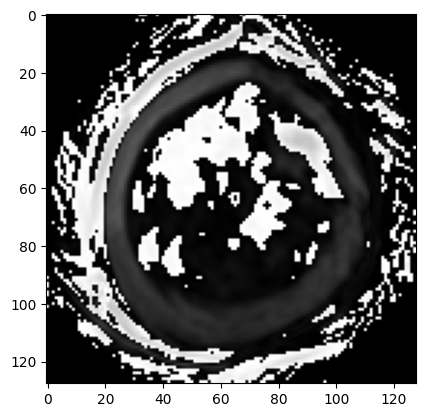

In [29]:
moving_image_train = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Frames_loc/patient003_frame15_slice_1_ACDC_#0_1.npy")
fixed_image_train = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Frames_loc/patient003_frame15_slice_1_ACDC_#0_2.npy")
x_displacement = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Displacement_loc/patient003_frame15_slice_1_ACDC_#0_x.npy")
y_displacement = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Displacement_loc/patient003_frame15_slice_1_ACDC_#0_y.npy")

# Apply displacement to the moving image
displaced_image = apply_displacement(moving_image_train, x_displacement, y_displacement)
plt.imshow(displaced_image - fixed_image_train, cmap='gray')
plt.show()


(128, 128)
(128, 128)
uint8
uint8
(128, 128)
(128, 128)
float64
float64


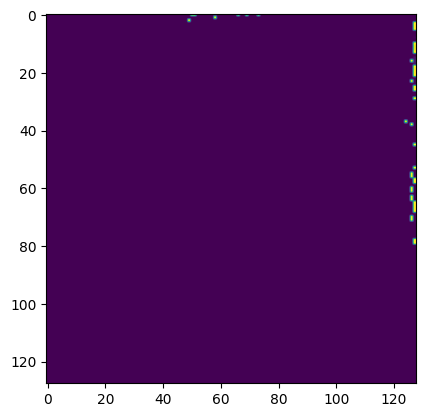

In [48]:
frame1 = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Frames_loc/patient005_frame13_slice_4_ACDC_#0_1.npy")
frame2 = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Frames_loc/patient005_frame13_slice_4_ACDC_#4_2.npy")
x_displacement = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Displacement_loc/patient005_frame13_slice_4_ACDC_#4_x.npy")
y_displacement = np.load("/Users/ahmed_ali/Documents/GitHub/GP-2025-Strain/Data/Simulated_V2/Displacement_loc/patient005_frame13_slice_4_ACDC_#4_y.npy")
# Apply displacement to the moving image
# frame1 = frame1[...,0]
# frame2 = frame2[...,0]
print(frame1.shape)
print(frame2.shape)
print(frame1.dtype)
print(frame2.dtype)
print(x_displacement.shape)
print(y_displacement.shape)
print(x_displacement.dtype)
print(y_displacement.dtype)
displaced_image = apply_displacement(frame1, x_displacement, y_displacement)
differ1 = displaced_image - frame2
plt.imshow(frame2 - displaced_image)
# plt.imshow(differ1 )
# plt.imshow(displaced_image - frame2)
plt.show()